In [ ]:
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv('/content/Fish.csv', index_col = 0)

Y = data['Weight']
Y.reset_index(drop=True, inplace=True)

Y = Y.values
Y = Y.reshape((-1, 1))

sel_column = Y[:,0]
mean_val = np.nanmean(sel_column)
sel_column[np.isnan(sel_column)] = mean_val

X = data.drop(['Weight'],axis = 1)
X.reset_index(inplace=True)
X = X.values

for i in range(0,2):
  sel_column = X[:,i]
  mean_val = np.nanmean(sel_column)
  sel_column[np.isnan(sel_column)] = mean_val

X_norm = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

In [ ]:
indices = np.arange(X.shape[0])
random.shuffle(indices)

In [ ]:
indices = np.arange(X.shape[0])
random.shuffle(indices)

In [ ]:
def split_data(X,Y,Xo,indices,test_size = 0.2,random_state = 0):
  np.random.seed(random_state)
  test_size = int(test_size * len(X))

  train_indices = indices[test_size:]
  test_indices = indices[:test_size]
  X_train = [X[i] for i in train_indices]
  Y_train = [Y[i] for i in train_indices]
  X_test = [X[i] for i in test_indices]
  Y_test = [Y[i] for i in test_indices]
  Xo_train = [Xo[i] for i in train_indices]
  Xo_test = [Xo[i] for i in test_indices]

  return np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test),np.asarray(Xo_train),np.asarray(Xo_test)

In [ ]:
def poly_trans(x,y,deg):
    for i in range(0,deg+1):
      for j in range(0,deg+1):
        if i+j <= deg:
          y = np.column_stack([y,np.multiply((x[:,0]**i),(x[:,1]**j))])
    return y

In [ ]:
def sgd_reg(X_train, Y_train, X_test, Y_test,learning_rate = 0.007, n_epochs = 500):

  training_error = []
  testing_error = []
  weights = np.zeros((1,X_train.shape[1]))

  for i in range(n_epochs):

    random_index = np.random.randint(X_train.shape[0])
    x = X_train[random_index].reshape(1,X_train.shape[1])
    y = Y_train[random_index].reshape(1,1)

    grad = (-x) * (y - np.matmul(x, weights.T))
    weights = weights - (learning_rate * grad)
    training_error.append(np.mean(np.square(np.matmul(X_train,weights.T)- Y_train))/2)

    testing_error.append(np.mean(np.square(np.matmul(X_test,weights.T)- Y_test))/2)

  return weights,training_error,testing_error

15852.15869792544
8719.791220261415


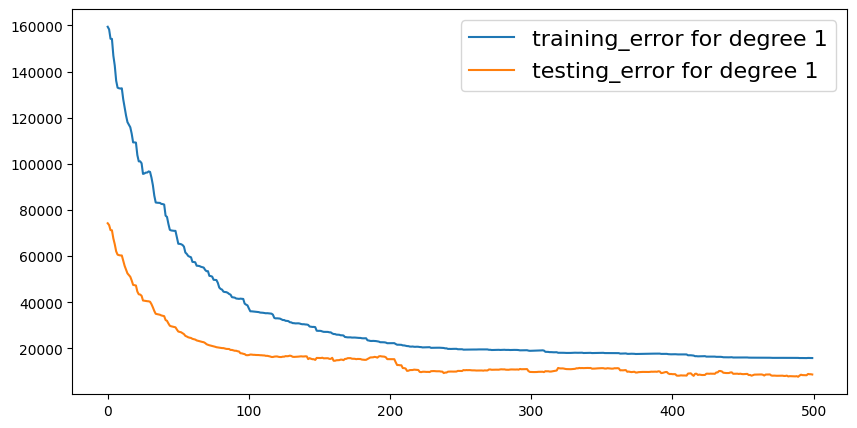

13479.235772553051
3327.3429132705382


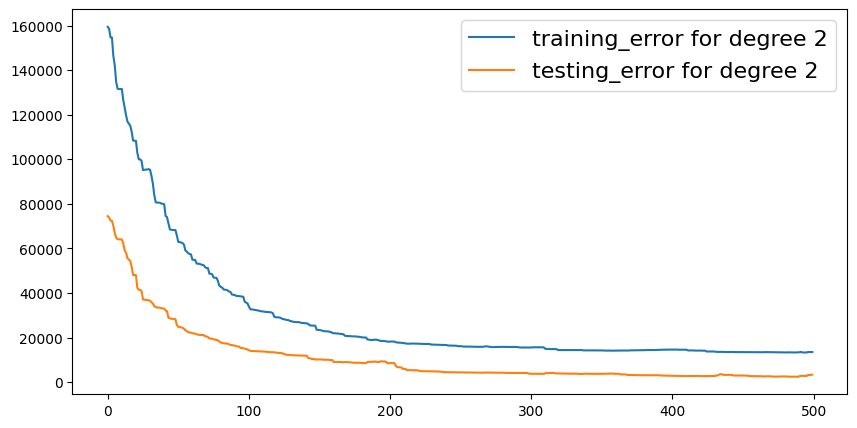

14744.537863173295
3280.90163775395


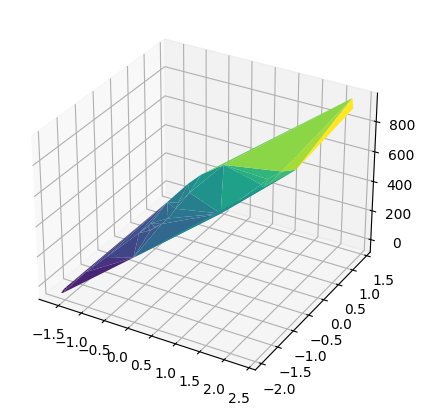

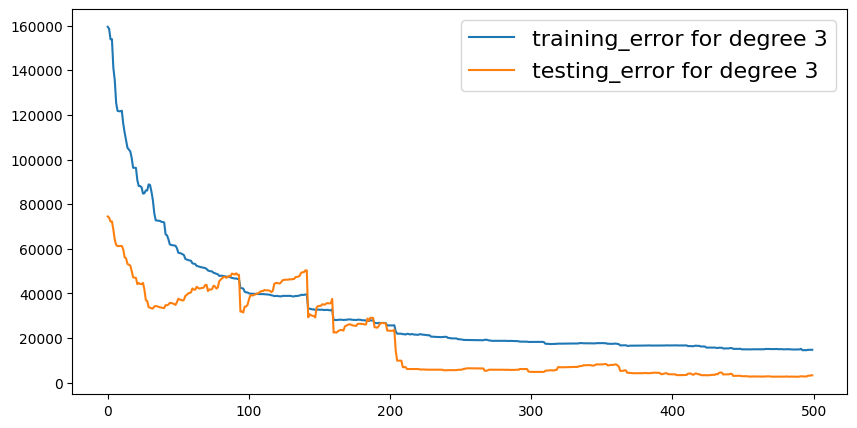

15741.389723735483
6118.05624542091


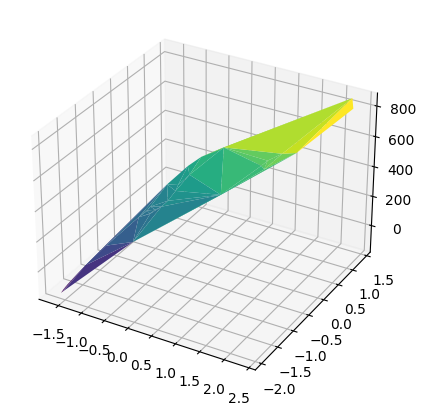

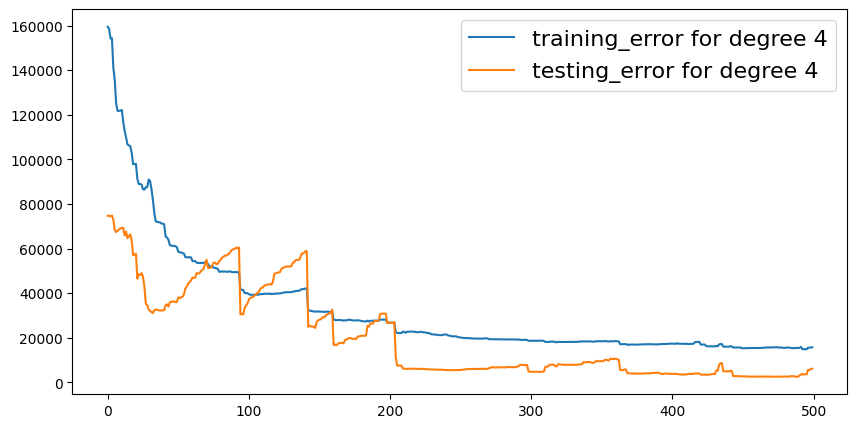

14132.666795253255
5357.611359115263


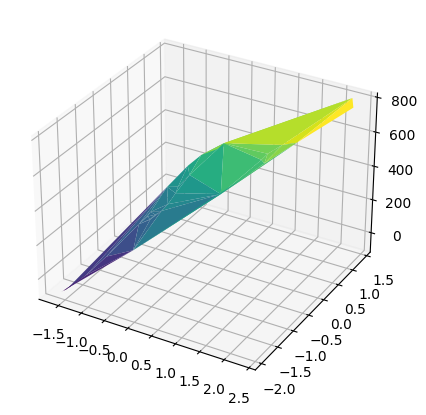

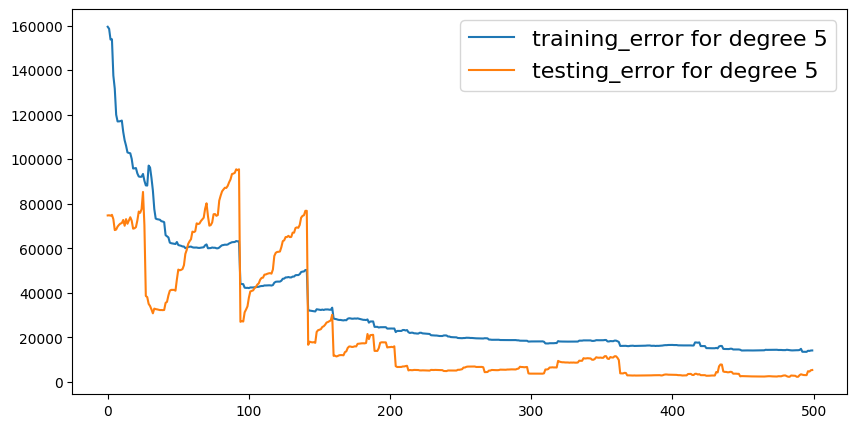

15734.269559432458
11015.994374271599


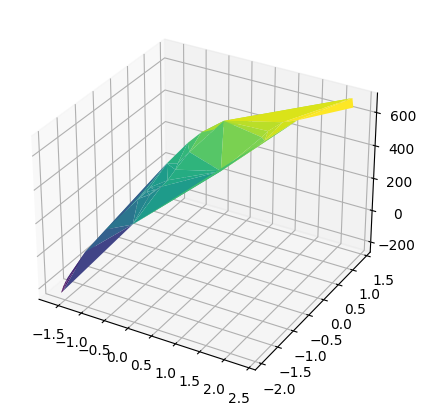

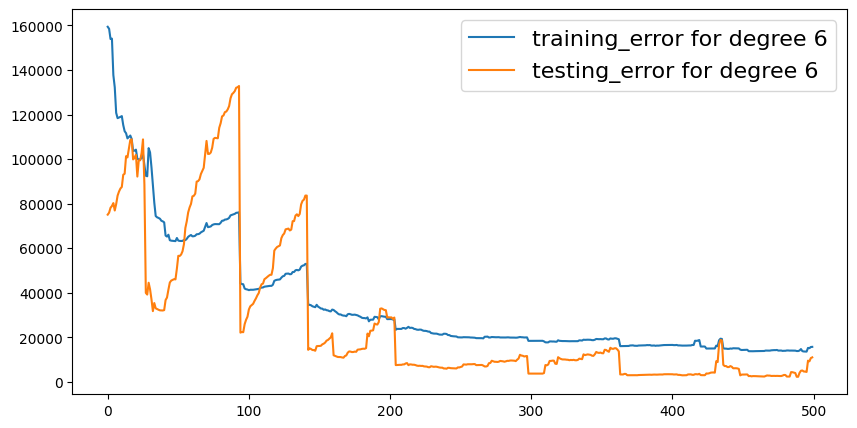

14904.482857599149
9510.260382136545


18090.941608942696
15126.969677319104


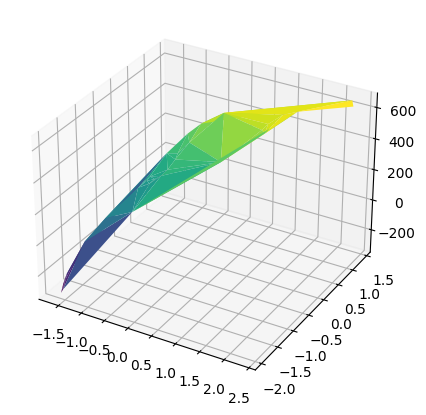

26198.687939777683
32978.737692721086


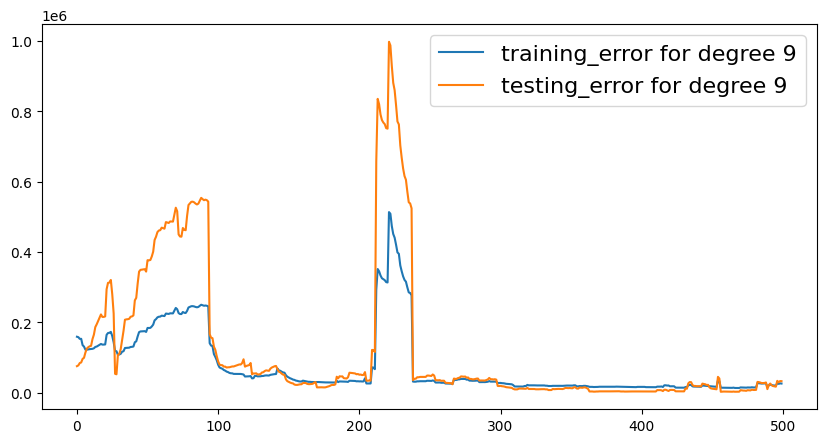

In [ ]:
for j in range(1,10):

  dum = np.zeros((X.shape[0],1))
  X_transformed = poly_trans(X_norm,dum,j)
  X_transformed = X_transformed[:,1:]

  X_transformed = np.delete(X_transformed,0,axis = 1)
  X_transformed = (X_transformed-np.mean(X_transformed,axis = 0))/np.std(X_transformed,axis = 0)
  X_transformed = np.insert(X_transformed,0,1,axis = 1)

  X_train, X_test, Y_train, Y_test, Xo_train, Xo_test = split_data(X_transformed, Y, X_norm, indices, test_size = 0.2, random_state = 0)

  weights,training_error,testing_error = sgd_reg(X_train, Y_train ,X_test, Y_test)
  pred_y = np.dot(X_test,weights.T)
  print(training_error[-1])
  print(testing_error[-1])

  pred_y = pred_y.reshape(-1,)
  fig = plt.figure(figsize = (10,5))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_trisurf(Xo_test[:,0],Xo_test[:,1],pred_y,cmap ='viridis')
  plt.show()

  plt.figure(figsize=(10,5))
  plt.plot(training_error, label= f'training_error for degree {j}')
  plt.plot(testing_error, label= f'testing_error for degree {j}')
  plt.legend(prop={'size': 16})
  plt.show()

In [ ]:
def bgd_reg(X_train, Y_train, X_test, Y_test,learning_rate = 0.007, n_epochs = 500):

  training_error = []
  testing_error = []
  weights = np.zeros((1,X_train.shape[1]))

  for i in range(n_epochs):

    Y_pred_train = np.matmul(X_train,weights.T)
    errors_train = Y_pred_train - Y_train
    grad =  np.matmul((X_train.T),(errors_train)) / (len(Y_train))
    weights = weights - (learning_rate * grad.T)
    training_error.append(np.mean(np.square(errors_train))/2)

    Y_pred_test = np.matmul(X_test,weights.T)
    errors_test = Y_pred_test - Y_test
    testing_error.append(np.mean(np.square(errors_test))/2)

  return weights,training_error,testing_error

15755.460326657216
8072.813857186695


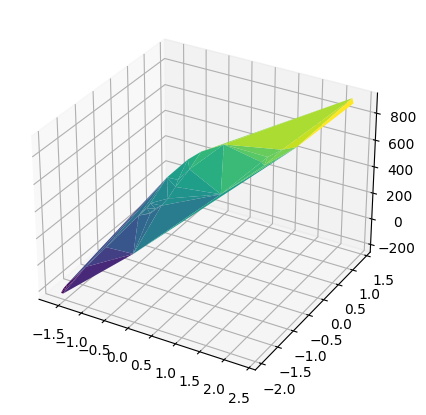

13054.789589038708
2508.546944667356


14230.283680087807
2650.8176550108296


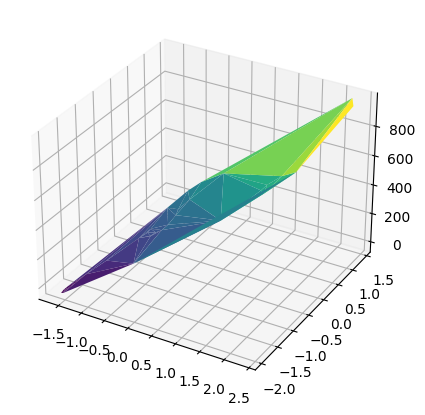

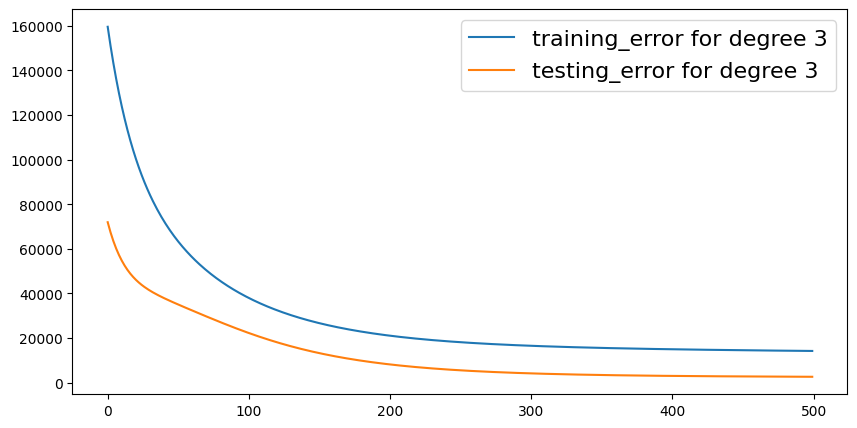

14393.698621666896
2666.8289489479357


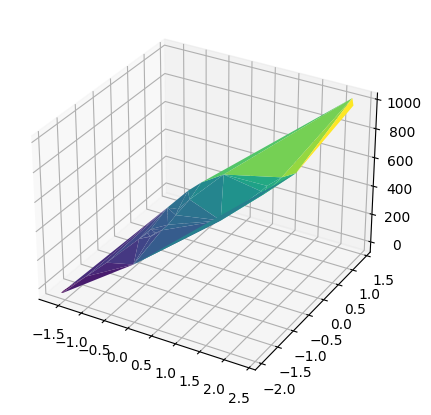

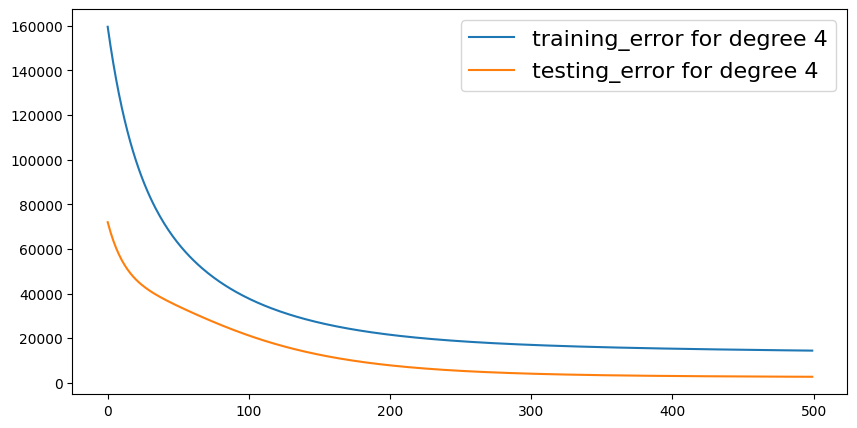

13456.530342696935
2396.2937980031365


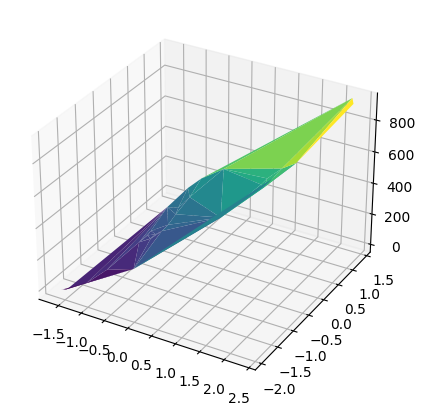

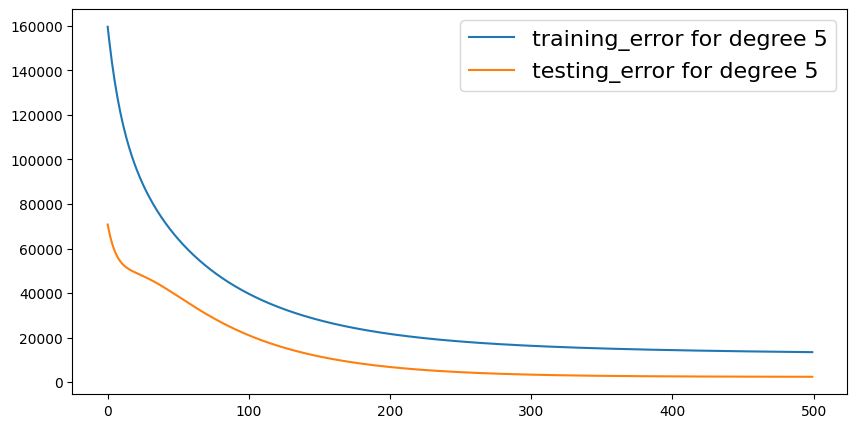

13201.19311360021
2356.4245224330766


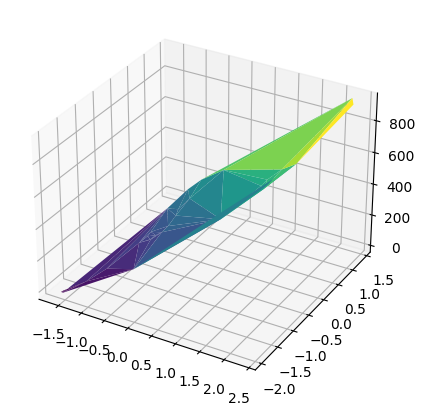

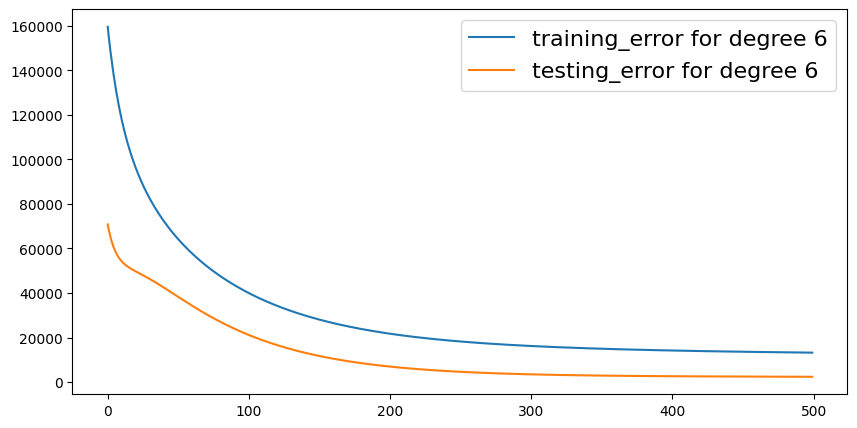

12907.329989248181
2575.5274952122363


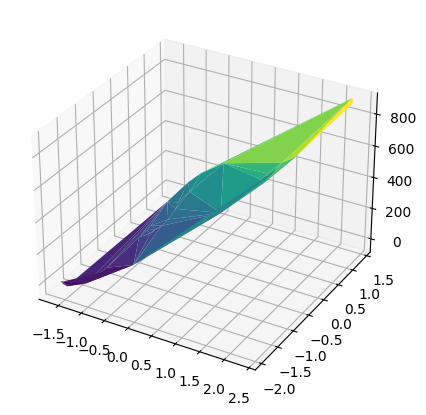

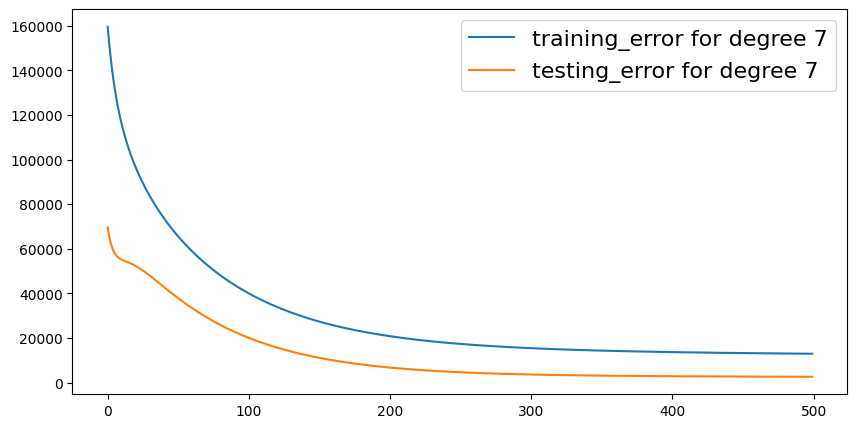

12813.382202072828
2443.501849490758


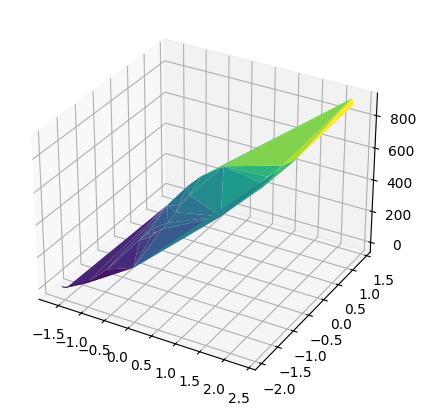

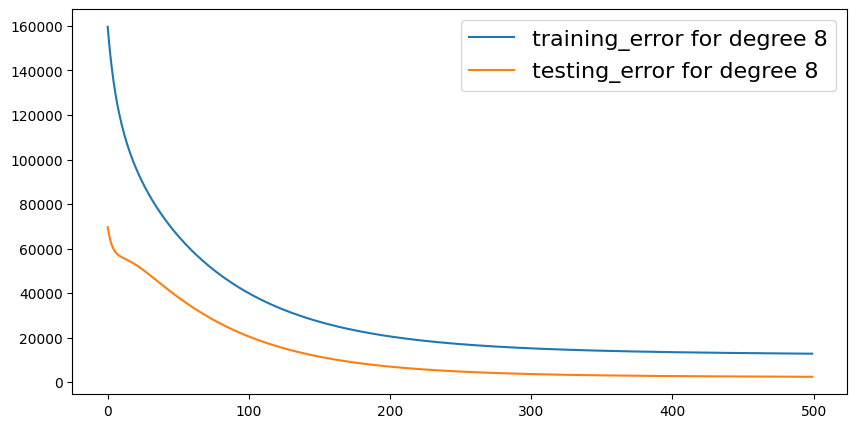

13023.837052423056
2717.4496829876443


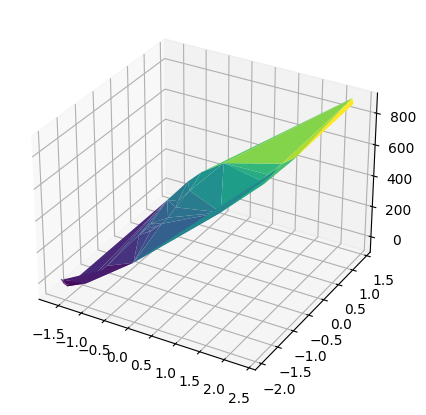

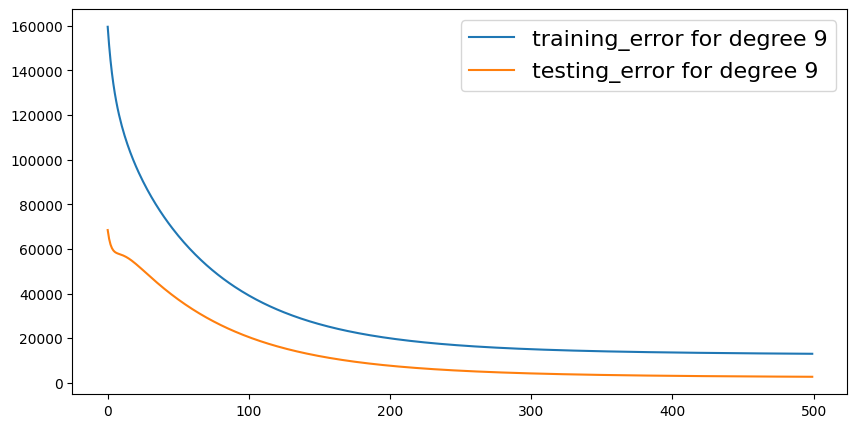

In [ ]:
for j in range(1,10):

  dum = np.zeros((X.shape[0],1))
  X_transformed = poly_trans(X_norm,dum,j)
  X_transformed = X_transformed[:,1:]

  X_transformed = np.delete(X_transformed,0,axis = 1)
  X_transformed = (X_transformed-np.mean(X_transformed,axis = 0))/np.std(X_transformed,axis = 0)
  X_transformed = np.insert(X_transformed,0,1,axis = 1)

  X_train, X_test, Y_train, Y_test, Xo_train, Xo_test = split_data(X_transformed, Y, X_norm, indices, test_size = 0.2, random_state = 0)

  weights,training_error,testing_error = bgd_reg(X_train, Y_train ,X_test, Y_test)
  pred_y = np.dot(X_test,weights.T)
  print(training_error[-1])
  print(testing_error[-1])
  pred_y = pred_y.reshape(-1,)
  fig = plt.figure(figsize = (10,5))
  res_x , res_y = np.meshgrid(Xo_test[:,0],Xo_test[:,1])
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_trisurf(Xo_test[:,0],Xo_test[:,1],pred_y,cmap ='viridis')
  plt.show()


  plt.figure(figsize=(10,5))
  plt.plot(training_error, label= f'training_error for degree {j}')
  plt.plot(testing_error, label= f'testing_error for degree {j}')
  plt.legend(prop={'size': 16})
  plt.show()